In [4]:
"""
Plotting utilities and theme settings for consistent, publication-quality visualizations.
Provides color palettes, sizing guidelines, and helper functions for scientific plots.
"""

import matplotlib.pyplot as plt
from typing import List, Tuple

# Disable LaTeX rendering by default
plt.rcParams['text.usetex'] = False

# ============================================================================
# Color Palettes
# ============================================================================

# High contrast colors for complex plots with multiple overlapping elements
# Use when data series need to be clearly distinguished in the same plot space
HIGH_CONTRAST_COLORS: List[str] = [
    'dodgerblue',    # Strong blue
    'crimson',       # Deep red
    'forestgreen',   # Rich green
    'darkorange',    # Bright orange
    'dimgrey',       # Neutral grey
    'purple',        # Deep purple
    'orchid'         # Light purple
]

# Aesthetic gradient for simple plots or subplots
# Use when data is spatially separated or for sequential/progressive data
AESTHETIC_COLORS: List[Tuple[float, float, float]] = [
    (4/256, 87/256, 172/256),    # Deep blue
    (48/256, 143/256, 172/256),  # Light blue
    (55/256, 189/256, 121/256),  # Bright green
    (167/256, 226/256, 55/256),  # Light green
    (244/256, 230/256, 4/256)    # Yellow
]

# ============================================================================
# Figure Sizing and Text Parameters
# ============================================================================

# Standard figure sizes (in inches)
SINGLE_COLUMN_WIDTH = 8.5    # Width for single-column journal figures
DOUBLE_COLUMN_WIDTH = 12.0   # Width for double-column journal figures
GOLDEN_RATIO = 1.618        # Aesthetic ratio for figure dimensions

# Font sizes optimized for readability in printed journals
FONT_SIZES = {
    'tiny': 8,
    'small': 10,
    'normal': 12,
    'large': 14,
    'xlarge': 16,
    'huge': 18
}

# Line widths and marker sizes
LINE_WIDTHS = {
    'thin': 0.5,
    'normal': 1.0,
    'thick': 2.0,
    'heavy': 3.0
}

MARKER_SIZES = {
    'tiny': 2,
    'small': 4,
    'normal': 6,
    'large': 8,
    'xlarge': 10
}

# ============================================================================
# Style Configuration
# ============================================================================

def set_science_style(use_tex: bool = True) -> None:
    """Configure matplotlib for scientific publication plots"""
    plt.style.use('seaborn-v0_8-paper')
    
    # Enable LaTeX rendering
    if use_tex:
        plt.rcParams.update({
            'text.usetex': True,
            'text.latex.preamble': r'\usepackage{lmodern}',
            'font.family': 'serif',
            'font.serif': ['Latin Modern Roman'],
        })
    
    # Update default parameters for publication quality
    plt.rcParams.update({
        'font.size': FONT_SIZES['normal'],
        'axes.labelsize': FONT_SIZES['large'],
        'axes.titlesize': FONT_SIZES['xlarge'],
        'xtick.labelsize': FONT_SIZES['normal'],
        'ytick.labelsize': FONT_SIZES['normal'],
        'legend.fontsize': FONT_SIZES['normal'],
        'figure.dpi': 300
    })

def get_figure_size(width: str = 'single', ratio: float = None) -> Tuple[float, float]:
    """
    Get recommended figure dimensions for publication
    
    Args:
        width: 'single' or 'double' for column width
        ratio: Optional custom aspect ratio (default: golden ratio)
    
    Returns:
        Tuple of (width, height) in inches
    """
    w = SINGLE_COLUMN_WIDTH if width == 'single' else DOUBLE_COLUMN_WIDTH
    r = ratio if ratio is not None else GOLDEN_RATIO
    return (w, w/r)

def get_color_cycle(palette: str = 'high_contrast', n: int = None) -> List:
    """
    Get a color cycle for plotting multiple data series
    
    Args:
        palette: 'high_contrast' or 'aesthetic'
        n: Number of colors needed (if None, returns full palette)
    
    Returns:
        List of colors
    """
    colors = HIGH_CONTRAST_COLORS if palette == 'high_contrast' else AESTHETIC_COLORS
    if n is not None:
        # Cycle colors if more are needed than available
        return [colors[i % len(colors)] for i in range(n)]
    return colors 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

voltage = np.array([4.000, 4.210, 4.175, 3.000, 3.500, 3.200, 3.700, 4.300, 4.500, 
                    4.700, 4.900, 5.000, 5.500, 6.000, 6.500, 6.999, 7.500, 8.000, 
                    8.500, 9.000])
current = np.array([0.976, 1.000, 1.000, 0.844, 0.910, 0.870, 0.939, 1.019, 1.044, 
                    1.066, 1.088, 1.097, 1.157, 1.209, 1.260, 1.306, 1.355, 1.397, 
                    1.446, 1.492])
peak_wavelength = np.array([811.0, 804.0, 802.8, 828.0, 818.0, 827.0, 814.0, 802.6, 
                            797.5, 793.6, 789.9, 788.4, 779.5, 771.8, 765.8, 760.2, 
                            753.9, 748.5, 743.6, 738.9])
wavelength_uncertainty = np.array([0.9, 0.6, 0.6, 11.0, 3.0, 6.0, 1.7, 0.5, 0.4, 
                                   0.30, 0.23, 0.24, 0.16, 0.13, 0.13, 0.13, 0.11, 
                                   0.11, 0.11, 0.11])
peak_intensity = np.array([0.009214913, 0.0106, 0.0107, 0.0025, 0.053, 0.00301, 0.0065, 
                           0.0123, 0.0147, 0.0171, 0.0201, 0.0214, 0.0310, 0.0422, 
                           0.0556, 0.0717, 0.0904, 0.113, 0.139, 0.167])

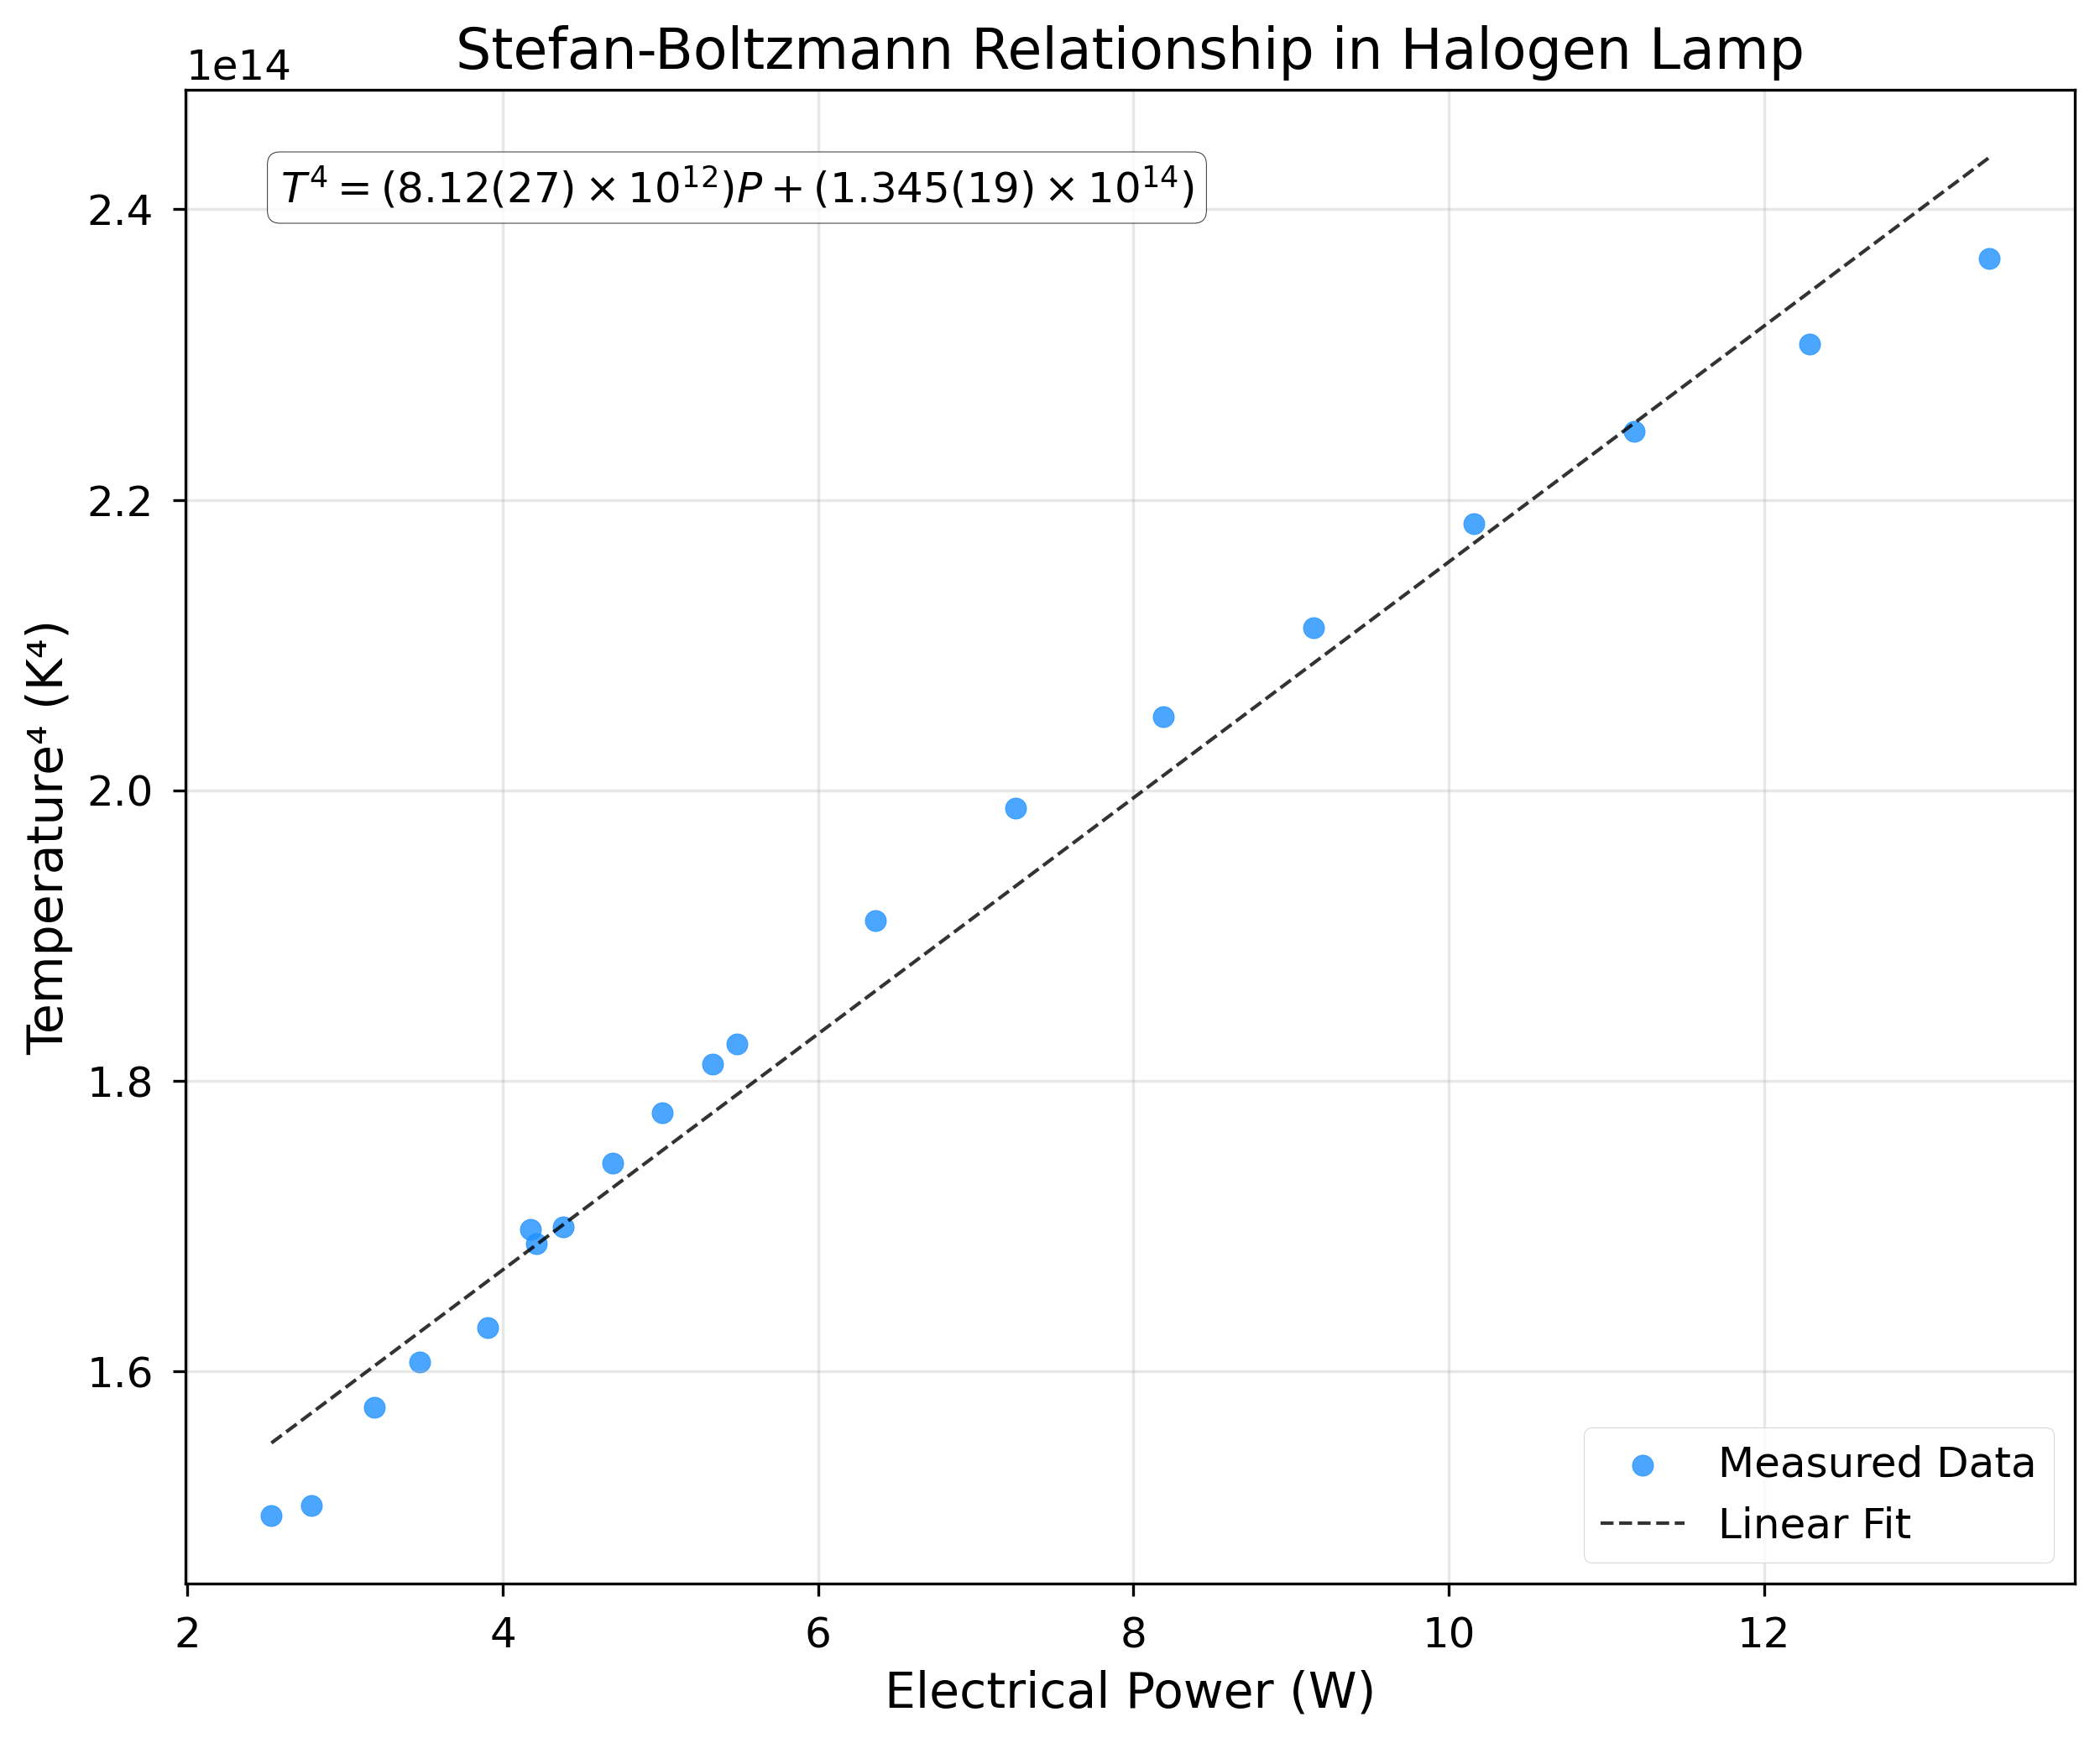

Temperature range: 3500K to 3922K
Power range: 2.53W to 13.43W


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from typing import Tuple
from uncertainties import ufloat

set_science_style(use_tex=False) 

b_nm = 2.898e-3 * 1e9 
T = b_nm / peak_wavelength 
T4 = T**4  

P_electrical = voltage * current  

T4_scale = 1e14  
T4_normalized = T4 / T4_scale

fig, ax = plt.subplots(figsize=get_figure_size('single', ratio=1.2))


ax.scatter(P_electrical, T4, 
          c=HIGH_CONTRAST_COLORS[0],
          s=MARKER_SIZES['normal']**2,
          alpha=0.8,
          label='Measured Data')


pfit, pcov = curve_fit(lambda x, m, b: m*x + b, P_electrical, T4_normalized)
perr = np.sqrt(np.diag(pcov))

x_fit = np.linspace(min(P_electrical), max(P_electrical), 100)
y_fit = (pfit[0]*x_fit + pfit[1]) * T4_scale

ax.plot(x_fit, y_fit, '--', 
        color="black",
        linewidth=LINE_WIDTHS['normal'],
        alpha=0.8,
        label=f'Linear Fit')

ax.set_xlabel('Electrical Power (W)')
ax.set_ylabel('Temperature⁴ (K⁴)')
ax.set_title('Stefan-Boltzmann Relationship in Halogen Lamp')
ax.grid(True, alpha=0.3)
ax.legend()

pfit_ufloat = ufloat(pfit[0], perr[0])
pfit_ufloat2 = ufloat(pfit[1], perr[1])

fit_text = f'$T^4 = ({pfit_ufloat*T4_scale:SL})P + ({pfit_ufloat2*T4_scale:SL})$'
ax.text(0.05, 0.95, fit_text,
        transform=ax.transAxes,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))


plt.tight_layout()
plt.savefig('halogen_lamp_fit.png', dpi=300)
plt.show()

print(f"Temperature range: {min(T):.0f}K to {max(T):.0f}K")
print(f"Power range: {min(P_electrical):.2f}W to {max(P_electrical):.2f}W")

In [7]:
"""
Plotting utilities and theme settings for consistent, publication-quality visualizations.
Provides color palettes, sizing guidelines, and helper functions for scientific plots.
"""

import matplotlib.pyplot as plt
from typing import List, Tuple

# Disable LaTeX rendering by default
plt.rcParams['text.usetex'] = False

# ============================================================================
# Color Palettes
# ============================================================================

# High contrast colors for complex plots with multiple overlapping elements
# Use when data series need to be clearly distinguished in the same plot space
HIGH_CONTRAST_COLORS: List[str] = [
    'dodgerblue',    # Strong blue
    'crimson',       # Deep red
    'forestgreen',   # Rich green
    'darkorange',    # Bright orange
    'dimgrey',       # Neutral grey
    'purple',        # Deep purple
    'orchid'         # Light purple
]

# Aesthetic gradient for simple plots or subplots
# Use when data is spatially separated or for sequential/progressive data
AESTHETIC_COLORS: List[Tuple[float, float, float]] = [
    (4/256, 87/256, 172/256),    # Deep blue
    (48/256, 143/256, 172/256),  # Light blue
    (55/256, 189/256, 121/256),  # Bright green
    (167/256, 226/256, 55/256),  # Light green
    (244/256, 230/256, 4/256)    # Yellow
]

# ============================================================================
# Figure Sizing and Text Parameters
# ============================================================================

# Standard figure sizes (in inches)
SINGLE_COLUMN_WIDTH = 8.5    # Width for single-column journal figures
DOUBLE_COLUMN_WIDTH = 12.0   # Width for double-column journal figures
GOLDEN_RATIO = 1.618        # Aesthetic ratio for figure dimensions

# Font sizes optimized for readability in printed journals
FONT_SIZES = {
    'tiny': 8,
    'small': 10,
    'normal': 12,
    'large': 14,
    'xlarge': 16,
    'huge': 18
}

# Line widths and marker sizes
LINE_WIDTHS = {
    'thin': 0.5,
    'normal': 1.0,
    'thick': 2.0,
    'heavy': 3.0
}

MARKER_SIZES = {
    'tiny': 2,
    'small': 4,
    'normal': 6,
    'large': 8,
    'xlarge': 10
}

# ============================================================================
# Style Configuration
# ============================================================================

def set_science_style(use_tex: bool = True) -> None:
    """Configure matplotlib for scientific publication plots"""
    plt.style.use('seaborn-v0_8-paper')
    
    # Enable LaTeX rendering
    if use_tex:
        plt.rcParams.update({
            'text.usetex': True,
            'text.latex.preamble': r'\usepackage{lmodern}',
            'font.family': 'serif',
            'font.serif': ['Latin Modern Roman'],
        })
    
    # Update default parameters for publication quality
    plt.rcParams.update({
        'font.size': FONT_SIZES['normal'],
        'axes.labelsize': FONT_SIZES['large'],
        'axes.titlesize': FONT_SIZES['xlarge'],
        'xtick.labelsize': FONT_SIZES['normal'],
        'ytick.labelsize': FONT_SIZES['normal'],
        'legend.fontsize': FONT_SIZES['normal'],
        'figure.dpi': 300
    })

def get_figure_size(width: str = 'single', ratio: float = None) -> Tuple[float, float]:
    """
    Get recommended figure dimensions for publication
    
    Args:
        width: 'single' or 'double' for column width
        ratio: Optional custom aspect ratio (default: golden ratio)
    
    Returns:
        Tuple of (width, height) in inches
    """
    w = SINGLE_COLUMN_WIDTH if width == 'single' else DOUBLE_COLUMN_WIDTH
    r = ratio if ratio is not None else GOLDEN_RATIO
    return (w, w/r)

def get_color_cycle(palette: str = 'high_contrast', n: int = None) -> List:
    """
    Get a color cycle for plotting multiple data series
    
    Args:
        palette: 'high_contrast' or 'aesthetic'
        n: Number of colors needed (if None, returns full palette)
    
    Returns:
        List of colors
    """
    colors = HIGH_CONTRAST_COLORS if palette == 'high_contrast' else AESTHETIC_COLORS
    if n is not None:
        # Cycle colors if more are needed than available
        return [colors[i % len(colors)] for i in range(n)]
    return colors 

Found 931 local minima, 320 meet threshold criteria
After proximity filtering (threshold=5 points): 209 peaks
Found 209 absorption peaks with ≥4.0% drop or ≥0.0100 absolute drop:
1. Wavelength: 761.21 nm, Drop: 63.41%, Abs Drop: 0.1496, Score: 1.00
2. Wavelength: 687.95 nm, Drop: 27.69%, Abs Drop: 0.1402, Score: 0.69
3. Wavelength: 397.36 nm, Drop: 41.43%, Abs Drop: 0.0393, Score: 0.46
4. Wavelength: 694.66 nm, Drop: 17.36%, Abs Drop: 0.0944, Score: 0.45
5. Wavelength: 656.62 nm, Drop: 16.45%, Abs Drop: 0.0962, Score: 0.45
6. Wavelength: 393.88 nm, Drop: 42.42%, Abs Drop: 0.0329, Score: 0.44
7. Wavelength: 628.90 nm, Drop: 12.46%, Abs Drop: 0.0918, Score: 0.41
8. Wavelength: 589.74 nm, Drop: 12.13%, Abs Drop: 0.0874, Score: 0.39
9. Wavelength: 719.47 nm, Drop: 16.81%, Abs Drop: 0.0761, Score: 0.39
10. Wavelength: 605.41 nm, Drop: 11.35%, Abs Drop: 0.0845, Score: 0.37
11. Wavelength: 430.96 nm, Drop: 23.96%, Abs Drop: 0.0540, Score: 0.37
12. Wavelength: 540.55 nm, Drop: 11.89%, Abs Drop

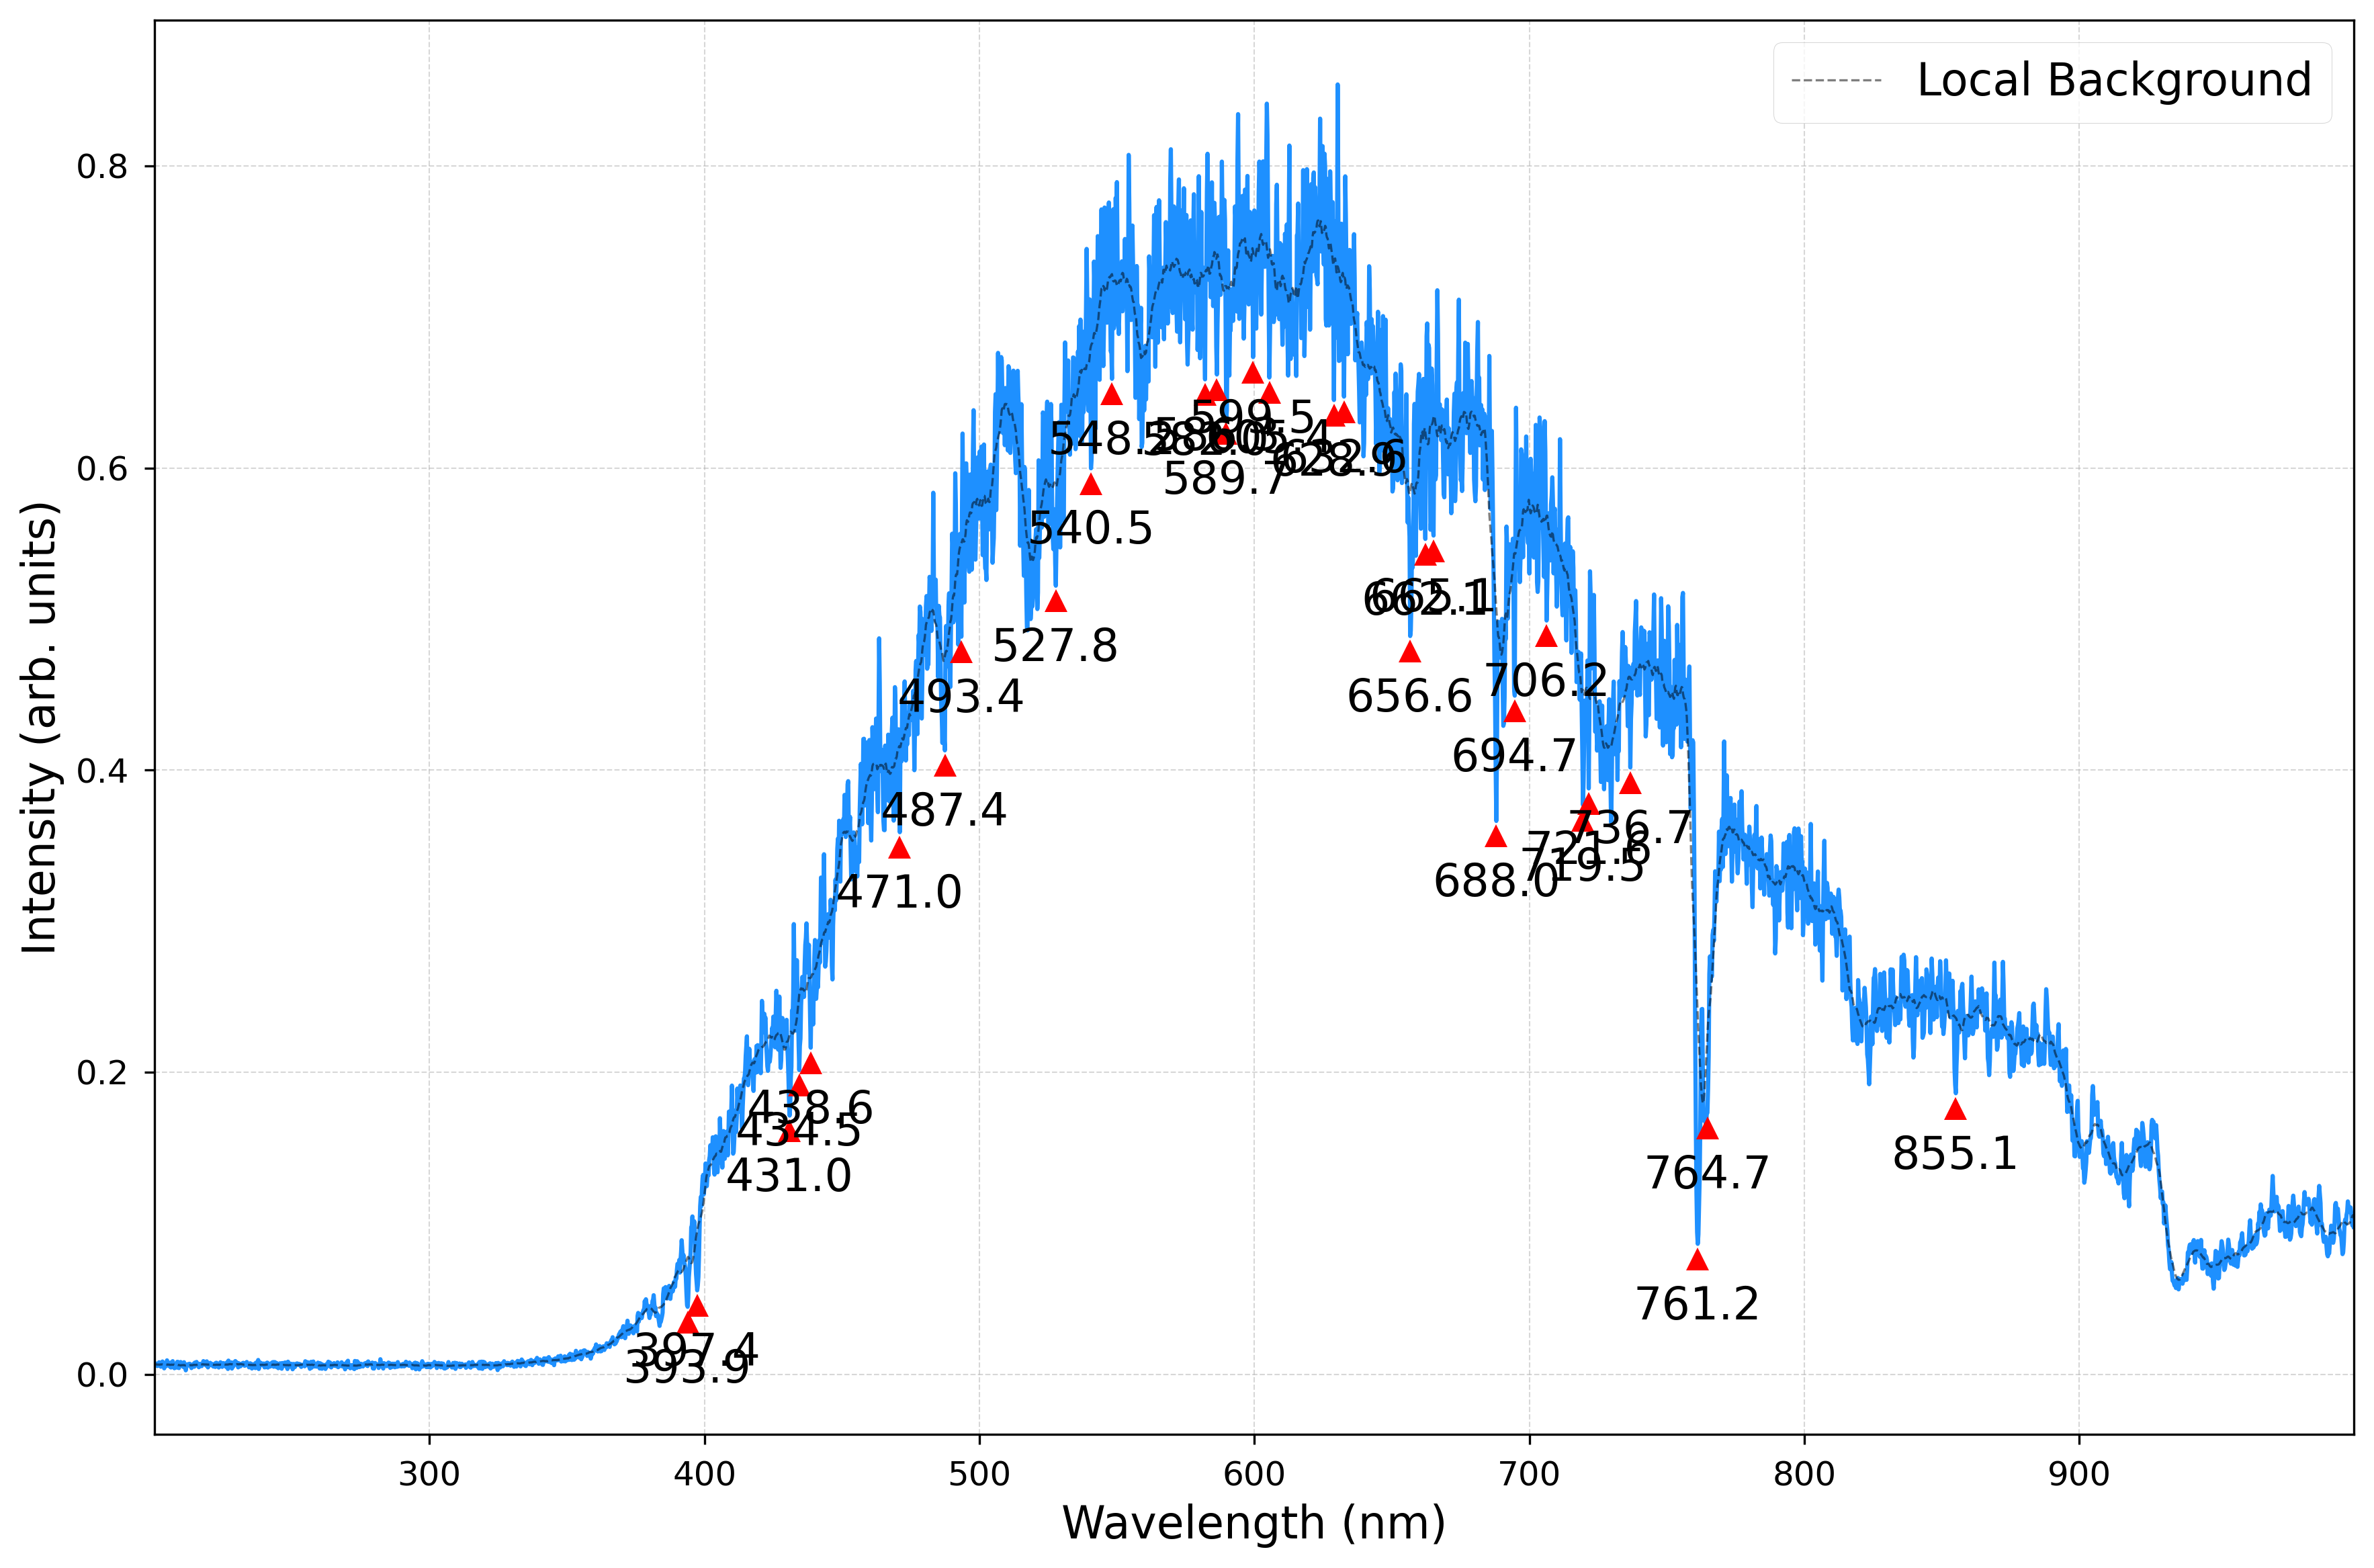

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
from plot_utils import set_science_style, get_figure_size, get_color_cycle, HIGH_CONTRAST_COLORS, FONT_SIZES
from scipy.signal import find_peaks

spectrum_data_folderpath = "./spectrum_data"

def plot_spectrum(file_path, wavelength_min=None, wavelength_max=None, color_idx=0, 
                  title=None, label=None, show_plot=True, ax=None, 
                  find_absorption=False, window_size=15, min_drop_percent=1.0,
                  min_abs_drop=None, max_peaks=15, proximity_threshold=5,
                  marker_offset=0.02, marker_text_offset=0.07):
    """
    Plot spectrum data from a file with wavelength and intensity values.
    
    Args:
        file_path (str): Path to the spectrum data file
        wavelength_min (float, optional): Minimum wavelength to display (nm)
        wavelength_max (float, optional): Maximum wavelength to display (nm)
        color_idx (int, optional): Index for color selection from the color palette
        title (str, optional): Plot title
        label (str, optional): Label for the spectrum in the legend
        show_plot (bool, optional): Whether to display the plot immediately
        ax (matplotlib.axes, optional): Axes to plot on (creates new figure if None)
        find_absorption (bool, optional): Whether to identify and mark absorption peaks
        window_size (int, optional): Window size for rolling average (must be odd)
        min_drop_percent (float, optional): Minimum percentage drop to identify as absorption peak
        min_abs_drop (float, optional): Minimum absolute drop value to identify as absorption peak
        max_peaks (int, optional): Maximum number of peaks to display on the plot
        proximity_threshold (int, optional): Minimum number of data points between peaks
        
    Returns:
        tuple: Figure and axes objects, and list of detected absorption peaks (if requested)
    """
    # Read the spectrum data from the file
    wavelengths = []
    intensities = []
    
    with open(file_path, 'r') as file:
        for line in file:
            if line.strip() and not line.startswith('#'):
                parts = line.strip().split()
                if len(parts) >= 2:
                    try:
                        wavelength = float(parts[0])
                        intensity = float(parts[1])
                        wavelengths.append(wavelength)
                        intensities.append(intensity)
                    except ValueError:
                        continue  # Skip lines that can't be converted to float
    
    wavelengths = np.array(wavelengths)
    intensities = np.array(intensities)
    
    # Apply wavelength bounds if specified
    if wavelength_min is not None or wavelength_max is not None:
        mask = np.ones_like(wavelengths, dtype=bool)
        if wavelength_min is not None:
            mask = mask & (wavelengths >= wavelength_min)
        if wavelength_max is not None:
            mask = mask & (wavelengths <= wavelength_max)
        
        wavelengths = wavelengths[mask]
        intensities = intensities[mask]
    
    # Create figure if no axes provided
    if ax is None:
        set_science_style(use_tex=False)  # Configure plot style
        # Custom figure size: width=12, height=8 inches
        fig, ax = plt.subplots(figsize=(12, 8))
        
        # Update font sizes to be larger
        plt.rcParams.update({
            'font.size': FONT_SIZES['large'],
            'axes.labelsize': FONT_SIZES['xlarge'],  # Larger axis labels
            'axes.titlesize': FONT_SIZES['xlarge'],
            'xtick.labelsize': FONT_SIZES['xlarge'],
            'ytick.labelsize': FONT_SIZES['xlarge'],
            'legend.fontsize': FONT_SIZES['xlarge']
        })
    else:
        fig = ax.figure
    
    # Get color from palette
    color = HIGH_CONTRAST_COLORS[color_idx % len(HIGH_CONTRAST_COLORS)]
    
    # Plot the spectrum
    ax.plot(wavelengths, intensities, color=color, linewidth=1.5, label=label)
    
    # Find absorption peaks if requested
    absorption_peaks = []
    if find_absorption:
        # Ensure window_size is odd
        if window_size % 2 == 0:
            window_size += 1
        
        half_window = window_size // 2
        
        # Calculate rolling average (local background)
        rolling_avg = np.zeros_like(intensities)
        for i in range(len(intensities)):
            start_idx = max(0, i - half_window)
            end_idx = min(len(intensities), i + half_window + 1)
            rolling_avg[i] = np.mean(intensities[start_idx:end_idx])
        
        # Find all local minima (points lower than both neighbors)
        all_minima = []
        for i in range(1, len(intensities) - 1):
            if (intensities[i] < intensities[i-1] and 
                intensities[i] < intensities[i+1]):
                
                # Calculate both absolute and relative drops
                abs_drop = rolling_avg[i] - intensities[i]
                rel_drop_percent = 100 * abs_drop / rolling_avg[i]
                
                all_minima.append({
                    'index': i,
                    'wavelength': wavelengths[i],
                    'intensity': intensities[i],
                    'background': rolling_avg[i],
                    'abs_drop': abs_drop,
                    'drop_percent': rel_drop_percent
                })
        
        # Apply threshold filtering - only keep peaks that meet criteria
        potential_peaks = []
        for peak in all_minima:
            meets_criteria = True  # Start assuming it meets criteria
            
            # Check percentage threshold
            if peak['drop_percent'] < min_drop_percent:
                meets_criteria = False
            
            # Check absolute threshold if specified
            if min_abs_drop is not None and peak['abs_drop'] < min_abs_drop:
                meets_criteria = False
            
            if meets_criteria:
                potential_peaks.append(peak)
        
        print(f"Found {len(all_minima)} local minima, {len(potential_peaks)} meet threshold criteria")
        
        # Create a hybrid score for sorting peaks
        # This combines both absolute and relative importance
        if potential_peaks:
            # Find maximum values for xlargeization
            max_abs_drop = max([p['abs_drop'] for p in potential_peaks])
            max_rel_drop = max([p['drop_percent'] for p in potential_peaks])
            
            for peak in potential_peaks:
                # xlargeize both metrics to give them equal weight
                norm_abs = peak['abs_drop'] / max_abs_drop
                norm_rel = peak['drop_percent'] / max_rel_drop
                
                # Hybrid score (equal weight to both metrics)
                peak['hybrid_score'] = (norm_abs + norm_rel) / 2
            
            # Sort peaks by hybrid score (largest first)
            potential_peaks.sort(key=lambda x: x['hybrid_score'], reverse=True)
        
        # Filter out peaks that are too close to each other (keep the stronger one)
        if proximity_threshold > 0 and potential_peaks:
            # First, sort by index to process in order of wavelength
            peaks_by_index = sorted(potential_peaks, key=lambda x: x['index'])
            filtered_peaks = [peaks_by_index[0]]  # Start with the first peak
            
            for peak in peaks_by_index[1:]:
                # Check if this peak is too close to the last kept peak
                last_kept = filtered_peaks[-1]
                if peak['index'] - last_kept['index'] <= proximity_threshold:
                    # Peaks are close - keep only the stronger one
                    if peak['hybrid_score'] > last_kept['hybrid_score']:
                        # Replace the last kept peak with this one
                        filtered_peaks[-1] = peak
                    # Otherwise, skip this peak (keep the last one)
                else:
                    # Peaks are far enough apart - keep both
                    filtered_peaks.append(peak)
            
            # Sort filtered peaks by hybrid score again
            filtered_peaks.sort(key=lambda x: x['hybrid_score'], reverse=True)
            potential_peaks = filtered_peaks
            
            print(f"After proximity filtering (threshold={proximity_threshold} points): {len(potential_peaks)} peaks")
        
        # Limit the number of peaks to display
        if max_peaks > 0:
            display_peaks = potential_peaks[:max_peaks]
        else:
            display_peaks = [] # don't show any peaks
        
        # Also plot the rolling average for reference
        ax.plot(wavelengths, rolling_avg, 'k--', alpha=0.5, linewidth=0.8, 
                label='Local Background')
        
        # Mark absorption peaks on the plot
        for peak in display_peaks:
            ax.plot(peak['wavelength'], peak['intensity'] - marker_offset, 'r^', markersize=8)  # Larger marker
            
            # Larger text for wavelength labels
            ax.text(peak['wavelength'], peak['intensity'] - marker_text_offset, 
                   f"{peak['wavelength']:.1f}", 
                   ha='center', fontsize=FONT_SIZES['xlarge'])
        
        # Store absorption peaks for return
        absorption_peaks = potential_peaks
        
        # Print summary of findings
        criteria_desc = f"≥{min_drop_percent}% drop"
        if min_abs_drop is not None:
            criteria_desc += f" or ≥{min_abs_drop:.4f} absolute drop"
            
        print(f"Found {len(potential_peaks)} absorption peaks with {criteria_desc}:")
        for i, peak in enumerate(potential_peaks[:max_peaks]):  # Show top max_peaks
            print(f"{i+1}. Wavelength: {peak['wavelength']:.2f} nm, Drop: {peak['drop_percent']:.2f}%, "
                  f"Abs Drop: {peak['abs_drop']:.4f}, Score: {peak['hybrid_score']:.2f}")
        if len(potential_peaks) > max_peaks:
            print(f"... and {len(potential_peaks) - max_peaks} more")
    
    # Set labels and title with larger font sizes
    ax.set_xlabel('Wavelength (nm)', fontsize=FONT_SIZES['xlarge'])
    ax.set_ylabel('Intensity (arb. units)', fontsize=FONT_SIZES['xlarge'])

    # Set the x-axis limits to the range of the data
    ax.set_xlim(wavelengths[0], wavelengths[-1])
    if title:
        ax.set_title(title)
    else:
        # Don't set a default title
        pass
    
    # Add legend if label provided or if we're showing absorption peaks
    if label or find_absorption:
        ax.legend(fontsize=FONT_SIZES['xlarge'])
    
    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.5, linewidth=0.5)
    
    # Tight layout for better spacing
    fig.tight_layout()

    # Save the plot to a file
    print(f"saving to {file_path.split('/')[-1]}.pdf")
    fig.savefig(f"./{file_path.split('/')[-1]}.pdf", dpi=300)
    
    if show_plot:
        plt.show()
    
    return (fig, ax, absorption_peaks) if find_absorption else (fig, ax)

if __name__ == "__main__":
    file_names_indices = {
    1: "blueskywith400umcable.txt",
    2: "blueskywithmarkers.txt",
    3: "directlyupwithmarkers.txt",
    4: "sunspecwith400umcable.txt",
    5: "sunspecwithmarkers.txt",
    6: "WhiteLEDLamp.txt",
    7: "LED1Blue.txt",
    8: "LED2Green.txt",
    9: "LED3Red.txt",
    10: "LED4Red2Color.txt",
    
    }

    # Example usage with larger plot and no title
    # fig, ax, peaks = plot_spectrum(
    #     f"{spectrum_data_folderpath}/{file_names_indices[6]}", 
    #     wavelength_min=300, 
    #     wavelength_max=800, 
    #     color_idx=0,
    #     show_plot=False,
    #     title=None,  # Remove title
    #     find_absorption=True,
    #     window_size=25,
    #     min_drop_percent=4.0,
    #     min_abs_drop=0.01,
    #     max_peaks=0,
    #     proximity_threshold=5,
    #     marker_offset=0.01,
    #     marker_text_offset=0.05
    # )

    fig, ax, peaks = plot_spectrum(
        f"{spectrum_data_folderpath}/{file_names_indices[5]}", 
        wavelength_min=200, 
        wavelength_max=1000, 
        color_idx=0,
        show_plot=False,
        title=None,  # Remove title
        find_absorption=True,
        window_size=25,
        min_drop_percent=4.0,
        min_abs_drop=0.01,
        max_peaks=30,
        proximity_threshold=5,
        marker_offset=0.01,
        marker_text_offset=0.05
    )



In [6]:
from uncertainties import ufloat
import numpy as np

wavelength_nm = ufloat(656.87, 0.13)

wavelength_m = wavelength_nm * 1e-9

n1 = 2
n2 = 3

delta_inv_squares = (1/n1**2 - 1/n2**2)
R_calculated = 1/wavelength_m / delta_inv_squares

R_accepted = 10973731.568160

percent_error = abs(R_calculated.n - R_accepted) / R_accepted * 100

print(f"Calculated Rydberg constant: {R_calculated:S} m^-1")
print(f"Accepted Rydberg constant: {R_accepted:.8f} m^-1")
print(f"Percent error: {percent_error:.4f}%")

Calculated Rydberg constant: 1.09611(22)e+07 m^-1
Accepted Rydberg constant: 10973731.56816000 m^-1
Percent error: 0.1154%
